In [33]:
from typing import List,TypedDict
# from pydantic import BaseModel
from langgraph.graph import StateGraph

In [34]:
class AgentState(TypedDict):
    value: List[int]
    name: str
    result: str

In [35]:
def process_values(state: AgentState) -> AgentState:
    """ 这个函数处理多个输入"""  
    state['result'] = f"Hi there {state["name"]}! You sum = {sum(state["value"])}"
    return state

In [36]:
graph = StateGraph(AgentState)

graph.add_node("process_values",process_values)
graph.set_entry_point("process_values")
graph.set_finish_point("process_values")
app = graph.compile()

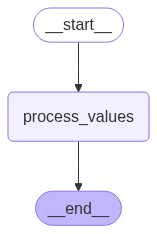

In [37]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [38]:
answers = app.invoke({"value":[1,2,3],"name":"cc"})

print(answers)

{'value': [1, 2, 3], 'name': 'cc', 'result': 'Hi there cc! You sum = 6'}


## 练习

In [40]:
from typing import List,TypedDict
from langgraph.graph import StateGraph

In [43]:
class AgentState(TypedDict):
    name: str
    value: List[int]
    operation: str
    result: str

In [49]:
def action(state: AgentState):
    """根据用户的操作计算结果"""
    from functools import reduce
    if state['operation'] == 'sum':
        state['result'] = f"hi there {state['name']}! You sum = {sum(state['value'])}"
    elif state['operation'] == '*':
        state['result'] = f"hi there {state['name']}! You multiply = {reduce(lambda x, y: x * y, state['value'])}"

    return state

In [50]:
graph = StateGraph(AgentState)

graph.add_node("action",action)
graph.set_entry_point("action")
graph.set_finish_point("action")
app = graph.compile()

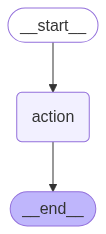

In [51]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [53]:
result = app.invoke({
    "name": "cc",
    "value": [1, 2, 3],
    "operation": "*"
})
print(result)

{'name': 'cc', 'value': [1, 2, 3], 'operation': '*', 'result': 'hi there cc! You multiply = 6'}
